In [1]:
import orjson
import pandas as pd
import matplotlib.pyplot as plt
from cointegration import calculate_cointegration, calculate_spread, calculate_zscore
%matplotlib inline

In [2]:
market_prices = orjson.loads(open("../../marketPrices.json","r").read())

In [3]:
sym1 = 'SUSHI-USD'
sym2 = 'MATIC-USD'

prices1 = [ float(c['close']) for c in market_prices[sym1]]
prices2 = [ float(c['close']) for c in market_prices[sym2]]

zscore_window = 21

coint = calculate_cointegration(prices1, prices2)
spread = calculate_spread(prices1, prices2, coint['hedgeRatio'])
zScore = calculate_zscore(spread, zscore_window)

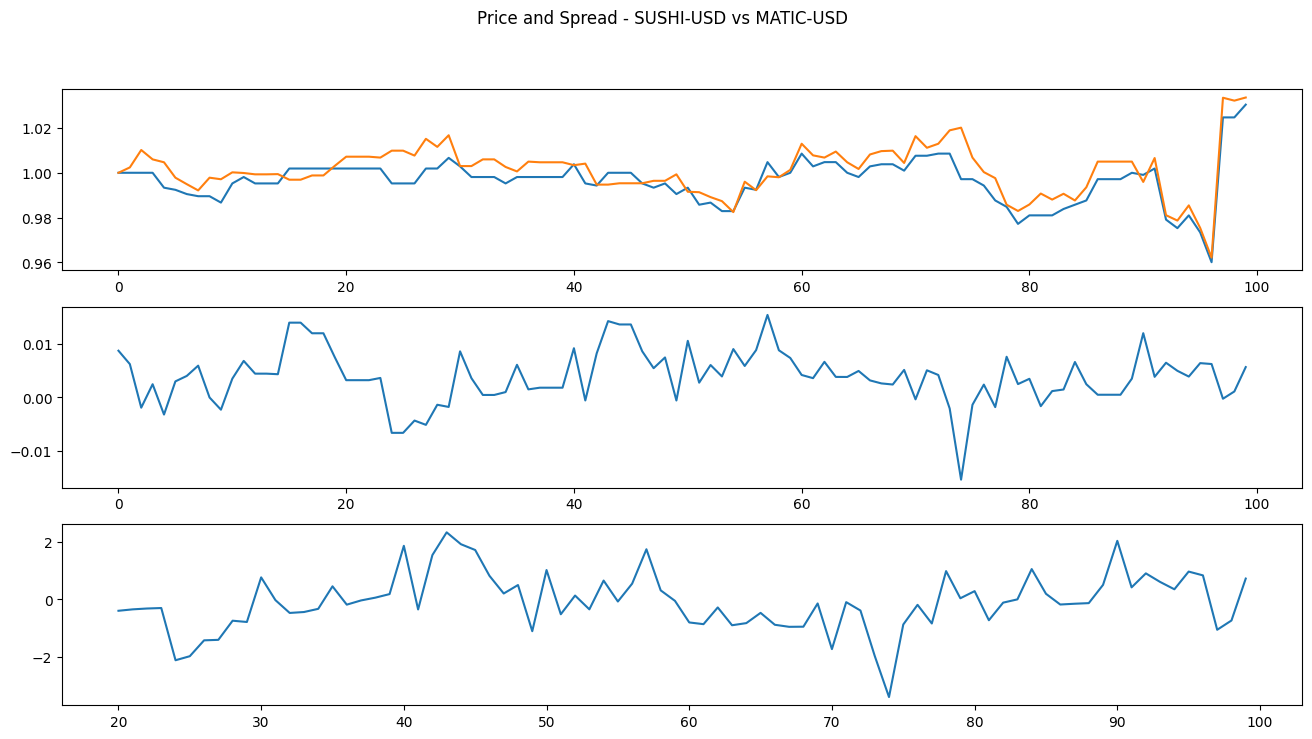

In [4]:
df = pd.DataFrame()
df[sym1] = prices1
df[sym2] = prices2
df[f'{sym1}_pct'] = df[sym1] / prices1[0]
df[f'{sym2}_pct'] = df[sym2] / prices2[0]

series1 = df[f'{sym1}_pct'].astype(float).values
series2 = df[f'{sym2}_pct'].astype(float).values

fig, axs = plt.subplots(3, figsize=(16, 8))
fig.suptitle(f'Price and Spread - {sym1} vs {sym2}')
axs[0].plot(series1)
axs[0].plot(series2)
axs[1].plot(spread)
axs[2].plot(zScore)

plt.show()


In [5]:
df2 = pd.DataFrame()
df2[sym1] = prices1
df2[sym2] = prices2
df2["Spread"] = spread
df2["ZScore"] = zScore 
df2 = df2.dropna(subset=['ZScore'])
df2

,SUSHI-USD,MATIC-USD,Spread,ZScore
20,1.053,1.0094,0.003224,-0.397058
21,1.053,1.0094,0.003224,-0.347880
22,1.053,1.0094,0.003224,-0.318568
23,1.053,1.0090,0.003640,-0.301909
24,1.046,1.0121,-0.006584,-2.112969
...,...,...,...,...
95,1.023,0.9775,0.006400,0.962299
96,1.009,0.9642,0.006232,0.830751
97,1.077,1.0358,-0.000232,-1.055843
98,1.077,1.0345,0.001120,-0.734691
